## Group No :151

## Group Member Names:

 1. Peyala Samarasimha Reddy - 2023AA05072 100% Contribution
 2. Monisha G - 2023AA05536 100% Contribution
 3. Akshay Mohan - 2023AA05315 100% Contribution
 4. Sreelakshmi Ajith - 2023AA05316 100% Contribution

## Journal used for the implemetation
Journal title:  Traffic Flow Prediction

Authors: Zhene Zou, Hao Peng, Lin Liu, Guixi Xiong, Bowen Du,Md Zakir ul Alam Bhuiyan, Yuntao Long, DaLi

Journal Name: Deep Convolutional Mesh RNN for Urban Traffic Passenger Flows Prediction

Year: 2018

Model Type: Regression Task

# 1. Import the required libraries

In [1]:
##---------Type the code below this line------------------##
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, Conv2D, BatchNormalization, Flatten, LSTM, Dense, Add, Reshape
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
import matplotlib.pyplot as plt


2024-09-22 16:08:25.115545: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-22 16:08:25.123257: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-22 16:08:25.132053: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-22 16:08:25.134673: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-22 16:08:25.141199: I tensorflow/core/platform/cpu_feature_guar

# 2. Data Acquisition

For the problem identified by you, students have to find the data source themselves from any data source.

Provide the URL of the data used.

Write Code for converting the above downloaded data into a form suitable for DL



Dataset is downloaded from here https://www.kaggle.com/datasets/akkithetechie/new-york-city-bike-share-dataset

In [2]:
##---------Type the code below this line------------------##
# Load the dataset
data = pd.read_csv('NYC-BikeShare-2015-2017-combined.csv')

data.head(5)


,Unnamed: 0,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,Trip_Duration_in_min
0,0,376,2015-10-01 00:16:26,2015-10-01 00:22:42,3212,Christ Hospital,40.734786,-74.050444,3207,Oakland Ave,40.737604,-74.052478,24470,Subscriber,1960.0,1,6
1,1,739,2015-10-01 00:27:12,2015-10-01 00:39:32,3207,Oakland Ave,40.737604,-74.052478,3212,Christ Hospital,40.734786,-74.050444,24481,Subscriber,1960.0,1,12
2,2,2714,2015-10-01 00:32:46,2015-10-01 01:18:01,3193,Lincoln Park,40.724605,-74.078406,3193,Lincoln Park,40.724605,-74.078406,24628,Subscriber,1983.0,1,45
3,3,275,2015-10-01 00:34:31,2015-10-01 00:39:06,3199,Newport Pkwy,40.728745,-74.032108,3187,Warren St,40.721124,-74.038051,24613,Subscriber,1975.0,1,5
4,4,561,2015-10-01 00:40:12,2015-10-01 00:49:33,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,24668,Customer,1984.0,0,9


In [10]:
# Basic preprocessing (handling missing values, encoding, etc.)
data.dropna(inplace=True)

# Convert 'Start Time' and 'Stop Time' to datetime
data['Start Time'] = pd.to_datetime(data['Start Time'])
data['Stop Time'] = pd.to_datetime(data['Stop Time'])

# Feature extraction
data['Start Hour'] = data['Start Time'].dt.hour
data['Day of Week'] = data['Start Time'].dt.dayofweek

# 3. Data Preparation

Perform the data prepracessing that is required for the data that you have downloaded.


This stage depends on the dataset that is used.

In [11]:
##---------Type the code below this line------------------##

## Split the data into training set and testing set
##---------Type the code below this line------------------##


## Identify the target variables.
##---------Type the code below this line------------------##

# Define features and target variable
X = data[['Start Station Latitude', 'Start Station Longitude', 'End Station Latitude', 
           'End Station Longitude']]
y = data['Trip_Duration_in_min'] # This is the target variable

# Select relevant features
features = data[['Start Hour', 'Day of Week', 'Start Station Latitude', 'Start Station Longitude',
                 'End Station Latitude', 'End Station Longitude']]

# Normalize the features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Reshape data for CNN input for our architecture
# We want to predict the next trip duration in mins based on the past 'n' trips
n_timesteps = 10
X, y = [], []
for i in range(len(features_scaled) - n_timesteps):
    X.append(features_scaled[i:i+n_timesteps])
    y.append(features_scaled[i+n_timesteps, -1])  # Trip duration in min is the last feature and it is the target variable
X, y = np.array(X), np.array(y)

# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Report the feature representation that is being used for training the model.

##---------Type below this line------------------##
print("Feature representation (X_train):")
print("Shape of X_train:", X_train.shape)
print("Sample of X_train:", X_train[:2])  # Print the first two samples for inspection

print("\nTarget variable (y_train):")
print("Shape of y_train:", y_train.shape)
print("Sample of y_train:", y_train[:2])  # Print the first two target values for inspection


Feature representation (X_train):
Shape of X_train: (588393, 10, 6)
Sample of X_train: [[[4.34782609e-01 0.00000000e+00 5.77171086e-01 9.74537394e-01
   9.98183396e-01 8.52635789e-04]
  [4.34782609e-01 0.00000000e+00 5.77171086e-01 9.74537394e-01
   9.97862864e-01 8.55429427e-04]
  [4.34782609e-01 0.00000000e+00 5.77171086e-01 9.74537394e-01
   9.97862864e-01 8.55429427e-04]
  [4.34782609e-01 0.00000000e+00 5.33472115e-01 2.85841599e-01
   9.98137231e-01 3.95623304e-04]
  [4.34782609e-01 0.00000000e+00 5.17680808e-01 5.05061053e-01
   9.97996211e-01 7.26334163e-04]
  [4.34782609e-01 0.00000000e+00 5.77171086e-01 9.74537394e-01
   9.97862864e-01 8.55429427e-04]
  [4.34782609e-01 0.00000000e+00 5.77171086e-01 9.74537394e-01
   9.97862864e-01 8.55429427e-04]
  [4.34782609e-01 0.00000000e+00 4.49709359e-01 8.30178385e-01
   9.98108717e-01 6.24589924e-04]
  [4.34782609e-01 0.00000000e+00 5.83387241e-01 8.12750106e-01
   9.97862864e-01 8.55429427e-04]
  [4.34782609e-01 0.00000000e+00 4.75368

## 4. Deep Neural Network Architecture


## 4.1 Design the architecture that you will be using

* CNN / RNN / Transformer as per the journal referenced



### Number of Layers in the Model

1. **Input Layer**: 
   - **Purpose**: Accepts input data with the defined shape (timesteps, features).

2. **Conv1D Layer (2 layers)**:
   - **Purpose**: These convolutional layers extract local patterns from the input sequences. The first layer has 64 filters with a kernel size of 3, and the second layer has the same configuration. The use of two layers allows the model to learn more complex features through hierarchical representation.

3. **Batch Normalization (2 layers)**:
   - **Purpose**: Normalizes the output of the convolutional layers, which helps in stabilizing the learning process and improving convergence speed.

4. **Residual Connection**:
   - **Purpose**: Adds the output of the second convolutional layer back to the input of that layer, allowing gradients to flow more easily during backpropagation. This helps in training deeper networks effectively.

5. **Flatten Layer**:
   - **Purpose**: Transforms the 3D output of the convolutional layers into a 2D array for the LSTM input.

6. **Reshape Layer**:
   - **Purpose**: Reshapes the flattened output back into the 3D shape expected by the LSTM layers.

7. **LSTM Layer (2 layers)**:
   - **Purpose**: The first LSTM layer returns sequences, which means it processes each timestep of the input sequence. The second LSTM layer summarizes the sequences, producing a single output for the entire sequence. This structure captures both short-term and long-term dependencies in the data.

8. **Output Layer**:
   - **Purpose**: A Dense layer with a linear activation function outputs the predicted trip duration.

### Summary of Layers
- Total **Layers**: 11 (including input, output)
  - 1 Input Layer
  - 2 Conv1D Layers
  - 2 Batch Normalization Layers
  - 1 Residual Connection
  - 1 Flatten Layer
  - 1 Reshape Layer
  - 2 LSTM Layers
  - 1 Output Layer

Designed the model architecture as defined in research paper, which is a CNN-RNN Mesh model with residual network.

In [23]:
# As per our understanding from the model section of paper, we defined this model and this is using for the regression task of timeseries traffic flow prediction
def build_dcmrnn_model(input_shape):
    inputs = Input(shape=input_shape)

    # Residual Convolutional Layers
    x = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    
    # Adding a Residual Connection
    residual = x
    x = Add()([x, residual])

    # Flatten and reshape for LSTM input
    x = Flatten()(x)
    x = Reshape((n_timesteps, 64))(x)

    # Mesh RNN Layer (Using LSTM)
    x1 = LSTM(64, return_sequences=True)(x)
    x2 = LSTM(64)(x1)

    # Output Layer
    outputs = Dense(1, activation='linear')(x2)

    model = Model(inputs, outputs)
    return model

# Define input shape
input_shape = (n_timesteps, features.shape[1])  # (timesteps, features)
model = build_dcmrnn_model(input_shape)

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'accuracy'])

# Print model summary
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 10, 6)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 10, 64)    │      1,216 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 10, 64)    │        256 │ conv1d_4[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, 10, 64)    │     12,352 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 10, 64)    │        256 │ conv1d_5[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 10, 64)    │          0 │ batch_normalizat… │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 640)       │          0 │ add_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_2 (Reshape) │ (None, 10, 64)    │          0 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_4 (LSTM)       │ (None, 10, 64)    │     33,024 │ reshape_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_5 (LSTM)       │ (None, 64)        │     33,024 │ lstm_4[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         65 │ lstm_5[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 80,193 (313.25 KB)

 Trainable params: 79,937 (312.25 KB)

 Non-trainable params: 256 (1.00 KB)

## 4.2 DNN Report

Report the following and provide justification for the same.

* Number of layers
* Number of units in each layer
* Total number of trainable parameters



### Number of Units in Each Layer with Justification

- Total 11 layers including input, output

1. **Input Layer**:
   - **Units**: Not applicable (just a placeholder for input shape).
   - **Justification**: The input layer shape is defined by `(n_timesteps, features.shape[1])`, which varies depending on the dataset.

2. **Conv1D Layers (2 layers)**:
   - **Units**: 64 filters in each layer.
   - **Justification**: 
     - **64 filters**: This number is a common choice in deep learning architectures, allowing the model to learn various feature representations from the input sequences. Using 64 filters helps balance between model complexity and training efficiency, capturing essential local patterns without excessive computational load.

3. **Batch Normalization Layers (2 layers)**:
   - **Units**: Not applicable (normalizes outputs of previous layers).
   - **Justification**: Batch normalization doesn’t have units like layers do; it simply standardizes the activations of the previous layer to improve training speed and stability.

4. **Residual Connection**:
   - **Units**: Not applicable (adds outputs of Conv1D layers).
   - **Justification**: The residual connection retains the same number of units as the previous layer, allowing gradients to flow easily during backpropagation. This aids in training deeper models effectively.

5. **Flatten Layer**:
   - **Units**: Not applicable (transforms the output to 2D).
   - **Justification**: The flattening operation does not introduce new units; it reshapes the data for LSTM processing. The output shape depends on the preceding layer's output.

6. **Reshape Layer**:
   - **Units**: Not applicable (reshapes for LSTM input).
   - **Justification**: Similar to the flatten layer, the reshape layer modifies the data structure but doesn’t add units. It ensures the data fits the expected shape for LSTM layers.

7. **LSTM Layers (2 layers)**:
   - **Units**: 64 units in the first LSTM layer and 64 units in the second LSTM layer.
   - **Justification**: 
     - **64 units**: A common choice that allows the model to capture both short-term and long-term dependencies in the data. Having the same number of units in both layers maintains consistency in the learning capacity of the model, enabling it to effectively learn complex sequential relationships.

8. **Output Layer**:
   - **Units**: 1 unit (for trip duration prediction).
   - **Justification**: This layer outputs a single continuous value, representing the predicted trip duration. A single unit is sufficient for regression tasks where only one output is needed.

### Summary of Units
- **Input Layer**: N/A
- **Conv1D Layers**: 64 units each (2 layers)
- **Batch Normalization Layers**: N/A
- **Residual Connection**: N/A
- **Flatten Layer**: N/A
- **Reshape Layer**: N/A
- **LSTM Layers**: 64 units each (2 layers)
- **Output Layer**: 1 unit

This architecture is designed to balance complexity and performance, ensuring the model is capable of learning from the dataset without overfitting or excessive computational demands.


In [24]:
##---------Type the answer below this line------------------### 

# Report DNN architecture with detailed layer information
layers = model.layers
num_layers = len(layers)

# Prepare a detailed report
layer_info = []
for layer in layers:
    layer_type = layer.__class__.__name__
    if isinstance(layer, Dense):
        units = layer.units
    elif isinstance(layer, LSTM):
        units = layer.units
    elif isinstance(layer, Conv1D):
        units = layer.filters
    else:
        units = 'N/A'
    
    layer_info.append(f"{layer_type}: {units}")

total_params = model.count_params()

# Print the results
print(f'Number of layers: {num_layers}')
print('Layer details:')
for info in layer_info:
    print(info)
print(f'Total number of trainable parameters: {total_params}')


Number of layers: 11
Layer details:
InputLayer: N/A
Conv1D: 64
BatchNormalization: N/A
Conv1D: 64
BatchNormalization: N/A
Add: N/A
Flatten: N/A
Reshape: N/A
LSTM: 64
LSTM: 64
Dense: 1
Total number of trainable parameters: 80193


# 5. Training the model

- Adam optimizer is used in thie model
- Regularizaiton is not implemented in this paper, so we are not implementing here
- Remaining details are given below

In [25]:
# Regularization everything defined in testing of model not needed here
# Training the model
history = model.fit(
    X_train,         # Training features
    y_train,         # Training labels
    validation_split=0.2,  # Use 20% of data for validation
    epochs=50,      # Train for 50 epochs
    batch_size=128,   # Process 128 samples at a time, for running 32 epochs it will more take time to run, so kept 128
    verbose=1        # Show training progress
)


Epoch 1/50
3678/3678 ━━━━━━━━━━━━━━━━━━━━ 74s 20ms/step - accuracy: 0.0012 - loss: 3.2874e-04 - mae: 0.0062 - val_accuracy: 9.5174e-04 - val_loss: 8.5670e-07 - val_mae: 7.4117e-04
Epoch 2/50
3678/3678 ━━━━━━━━━━━━━━━━━━━━ 65s 18ms/step - accuracy: 0.0011 - loss: 2.0670e-06 - mae: 7.3230e-04 - val_accuracy: 9.5174e-04 - val_loss: 8.3226e-08 - val_mae: 2.1758e-04
Epoch 3/50
3678/3678 ━━━━━━━━━━━━━━━━━━━━ 70s 19ms/step - accuracy: 0.0010 - loss: 6.0409e-06 - mae: 2.5520e-04 - val_accuracy: 9.5174e-04 - val_loss: 2.9280e-08 - val_mae: 1.2861e-04
Epoch 4/50
3678/3678 ━━━━━━━━━━━━━━━━━━━━ 71s 19ms/step - accuracy: 0.0012 - loss: 5.7915e-06 - mae: 2.0843e-04 - val_accuracy: 9.5174e-04 - val_loss: 2.3640e-08 - val_mae: 1.1430e-04
Epoch 5/50
3678/3678 ━━━━━━━━━━━━━━━━━━━━ 65s 18ms/step - accuracy: 0.0011 - loss: 6.5855e-06 - mae: 1.8387e-04 - val_accuracy: 9.5174e-04 - val_loss: 2.7380e-08 - val_mae: 1.1856e-04
Epoch 6/50
3678/3678 ━━━━━━━━━━━━━━━━━━━━ 60s 16ms/step - accuracy: 0.0011 - loss: 7

# 6. Test the model


Testing Model details:
- Evaluate: Computes test loss (Mean Squared Error) and Mean Absolute Error on the test set.
- Predict: Generates predictions for the test data.
- Calculate MSE: Measures the average squared difference between actual and predicted values.
- Output: Prints test loss, MAE, and MSE for model performance assessment.


In [26]:
##---------Type the code below this line------------------##

# Metrics: Mean Absolute Error (MAE) is used for evaluating model performance during training.
# Evaluate the model on the test set
test_loss, test_mae, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}, Test Accuracy: {test_accuracy}')

# Predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


4597/4597 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.0011 - loss: 3.2597e-05 - mae: 1.9155e-04
Test Loss: 1.361276281386381e-05, Test MAE: 0.00017246973584406078, Test Accuracy: 0.0010945009998977184
4597/4597 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step
Mean Squared Error: 1.3612776140645046e-05


# 7. Report the result

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history.
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


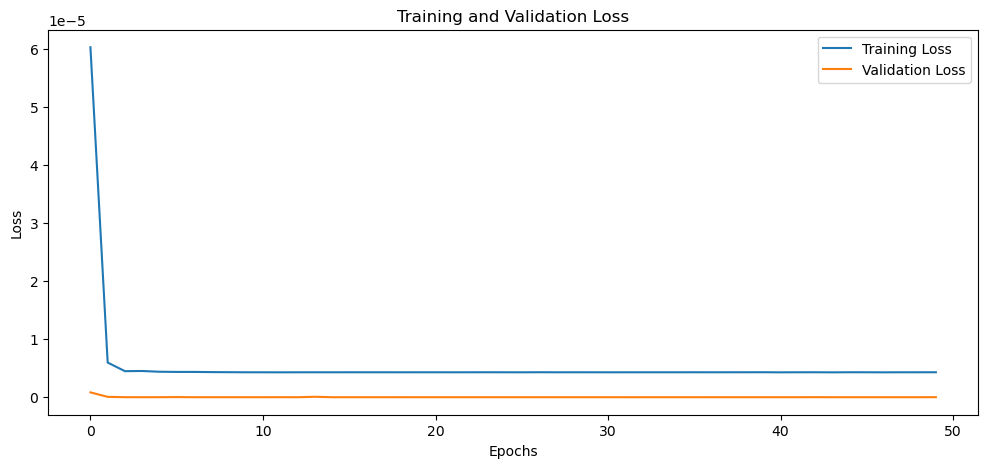

In [27]:
##---------Type the code below this line------------------##
# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Note: This paper implementation is a regression task. To plot the accuracies, it's apt only for the classification tasks only

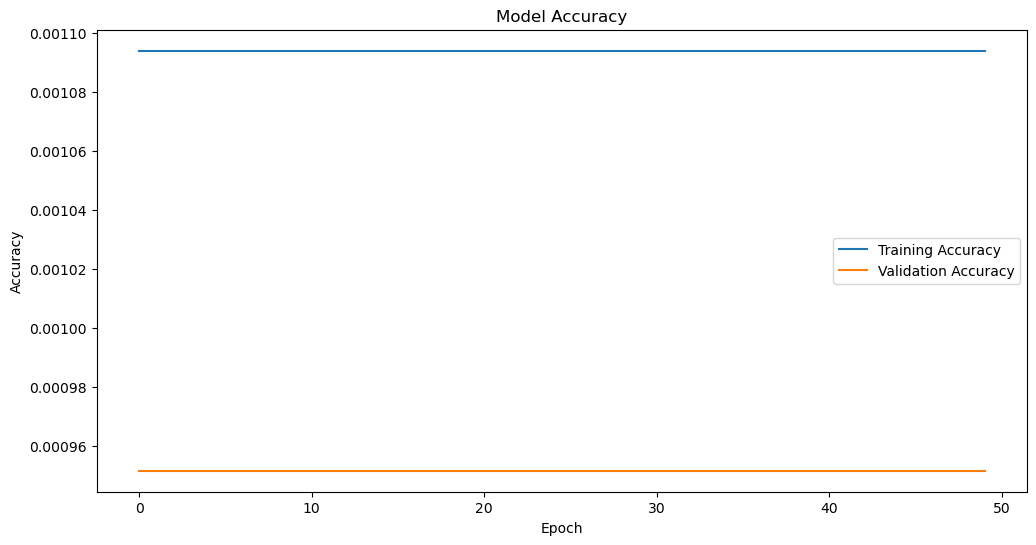

In [28]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

- Test Loss: 1.361276281386381e-05
- Test MAE: 0.00017246973584406078
- Test Accuracy: 0.0010945009998977184 (Accuracies apt for the classification task but this implementation is regression task)
- Mean Squared Error: 1.3612776140645046e-05

These caculated in the test the model step only.

- Since this implementation a regression task, not the classification task, so we cann't plot the confusion matrix but we have created three classes of Low, Medium, High threshold with the given data and plotted but only for classification task's only confusion matric possible.
- Metrics like accuracy, precision, recall, F1 Score are possible for classification tasks only but here we created low, medium, high categories of threshold with the given data and calculated

              precision    recall  f1-score   support

         Low       1.00      1.00      1.00    147099
      Medium       0.00      0.00      0.00         0
        High       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00    147099
   macro avg       0.33      0.33      0.33    147099
weighted avg       1.00      1.00      1.00    147099



/home/samara/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/samara/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/samara/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/samara/a

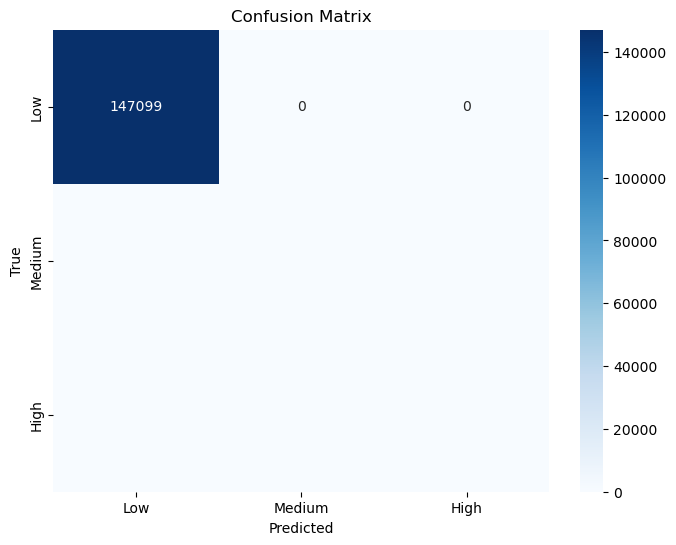

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Define thresholds for classification
thresholds = [0, 10, 20]  
labels = ['Low', 'Medium', 'High']

# Create categories based on thresholds
y_test_categories = np.digitize(y_test, thresholds) - 1  
y_pred_categories = np.digitize(y_pred, thresholds) - 1  

# Ensure categories are in the correct range
y_test_categories = np.clip(y_test_categories, 0, len(labels) - 1)
y_pred_categories = np.clip(y_pred_categories, 0, len(labels) - 1)

# Generate classification report
report = classification_report(y_test_categories, y_pred_categories, target_names=labels, labels=range(len(labels)))
print(report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_categories, y_pred_categories, labels=range(len(labels)))

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### NOTE


All Late Submissions will incur a <b>penalty of -2 marks </b>. So submit your assignments on time.

Good Luck